In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
n = 5000

# Initialize exogenous variables; normal errors, uniformly distributed covariates and instruments
e = np.random.normal(size=(n,)) / 5
x = np.random.uniform(low=0.0, high=10.0, size=(n,))
z = np.random.uniform(low=0.0, high=10.0, size=(n,))

# Initialize treatment variable
# t = np.sqrt((x + 2) * z) + e
t = np.sqrt(2 * z + x * z + x * x + x) + e
# Show the marginal distribution of t


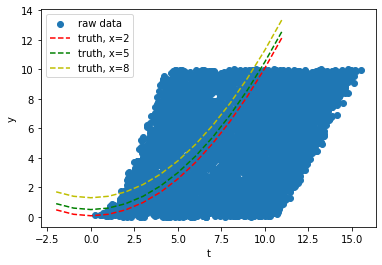

In [3]:
y = t*t / 10 +  x * x / 50 + e

# The endogeneity problem is clear, the latent error enters both treatment and outcome equally
plt.scatter(t,z, label ='raw data')
tticks = np.arange(-2,12)
yticks2 = tticks*tticks/10 + 0.08
yticks5 = tticks*tticks/10 + 0.5
yticks8 = tticks*tticks/10  + 1.3
plt.plot(tticks,yticks2, 'r--', label = 'truth, x=2')
plt.plot(tticks,yticks5, 'g--', label = 'truth, x=5')
plt.plot(tticks,yticks8, 'y--', label = 'truth, x=8')
plt.xlabel("t")
plt.ylabel("y")
plt.legend()
plt.show()

In [4]:
import pandas as pd
data_dict = {
    'z': z,
    'w': x,
    'x': t,
    'y': y
}
data = pd.DataFrame(data_dict)
data.head()

,z,w,x,y
0,5.877411,0.046600,3.576015,1.379580
1,7.987339,5.167602,9.491644,9.594423
2,3.020075,9.318686,11.191844,14.037690
3,8.144263,9.709740,14.140026,21.900293
4,1.455380,3.993050,5.206319,2.882313


In [5]:
from estimator_model.iv import NP2SLS

In [6]:
iv = NP2SLS()
iv.fit(
    data=data,
    outcome='y',
    treatment='x',
    instrument='z',
    covariate='w',
    covar_basis=('Poly', 2),
    treatment_basis=('Poly', 2),
    instrument_basis=('Poly', 1),    
)

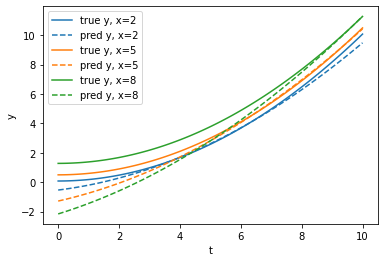

In [7]:
n_test = 500
for i, x in enumerate([2, 5, 8]):
    t = np.linspace(0,10,num = 100)
    # y_true = t*t / 10 - x*t/10
    y_true = t * t / 10 + x * x / 50

    test_data = pd.DataFrame(
        {'x': t,
         'w': np.full_like(t, x),}
    )
    y_pred = iv.estimate(data=test_data)
    plt.plot(t, y_true, label='true y, x={0}'.format(x),color='C'+str(i))
    plt.plot(t, y_pred, label='pred y, x={0}'.format(x),color='C'+str(i),ls='--')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

Test for the special case: 2SLS

In [8]:
n = 5000

# Initialize exogenous variables; normal errors, uniformly distributed covariates and instruments
e = np.random.normal(size=(n,))
x = np.random.uniform(low=0.0, high=10.0, size=(n,)) + e
z = np.random.uniform(low=0.0, high=10.0, size=(n,))

# Initialize treatment variable
# t = np.sqrt((x + 2) * z) + e
t = x * z + e + z
y = t * x / 2 +  x / 5 + e

data_dict = {
    'z': z,
    'w': x,
    'x': t,
    'y': y
}
data = pd.DataFrame(data_dict)
data.head()

,z,w,x,y
0,4.775511,5.422209,29.088692,78.366293
1,2.003120,6.954878,14.473404,50.260186
2,1.874361,0.591060,2.419692,0.270775
3,5.706831,9.648083,60.898766,295.839754
4,9.648151,3.730027,45.742907,86.164041


In [9]:
iv = NP2SLS()
iv.fit(
    data=data,
    outcome='y',
    treatment='x',
    instrument='z',
    covariate='w',
    covar_basis=('Poly', 1),
    treatment_basis=('Poly', 1),
    instrument_basis=('Poly', 1),    
)

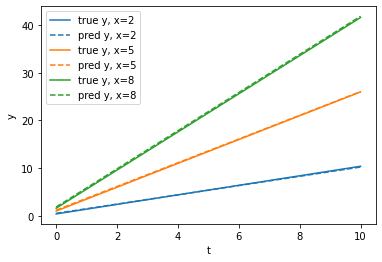

In [10]:
n_test = 500
for i, x in enumerate([2, 5, 8]):
    t = np.linspace(0,10,num = 100)
    # y_true = t*t / 10 - x*t/10
    # y_true = t * t / 10 + x * x / 50
    y_true = t * x / 2 +  x / 5

    
    test_data = pd.DataFrame(
        {'x': t,
         'w': np.full_like(t, x),}
    )
    y_pred = iv.estimate(data=test_data)
    plt.plot(t, y_true, label='true y, x={0}'.format(x),color='C'+str(i))
    plt.plot(t, y_pred, label='pred y, x={0}'.format(x),color='C'+str(i),ls='--')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()

### We compare the IV results in last section to results of naive LinearRegression to indicate the effetiveness of IV.

In [11]:
from sklearn.linear_model import LinearRegression

In [12]:
n = 5000

# Initialize exogenous variables; normal errors, uniformly distributed covariates and instruments
e = np.random.normal(size=(n,))
# x = np.random.uniform(low=0.0, high=10.0, size=(n,))
z = np.random.uniform(low=0.0, high=10.0, size=(n,))

# Initialize treatment variable
# t = np.sqrt((x + 2) * z) + e

In [13]:
x = np.ones((n, )) * 2 + e
t = (x * z + e + z)
y = t * x / 2 +  x / 5 + e

l2 = LinearRegression()
l2.fit(t.reshape(-1, 1), y.squeeze())

LinearRegression()

In [14]:
x = np.ones((n, )) * 5 + e
t = (x * z + e + z)
y = (t * x / 2 +  x / 5 + e)

l5 = LinearRegression()
l5.fit(t.reshape(-1, 1), y.squeeze())

LinearRegression()

In [15]:
x = np.ones((n, )) * 8 + e
t = (x * z + e + z)
y = t * x / 2 +  x / 5 + e

l8 = LinearRegression()
l8.fit(t.reshape(-1, 1), y.squeeze())

LinearRegression()

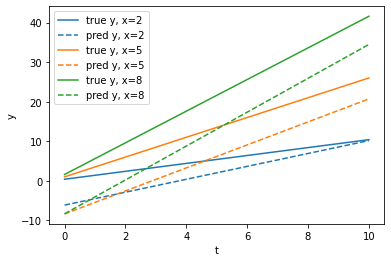

In [16]:
n_test = 500
model = [l2, l5, l8]
for i, x in enumerate([2, 5, 8]):
    t = np.linspace(0,10,num = 100)
    # y_true = t*t / 10 - x*t/10
    # y_true = t * t / 10 + x * x / 50
    x_ = np.full_like(t, x)
    y_true = t * x_ / 2 +  x_ / 5

    y_pred = model[i].predict(t.reshape(-1, 1))
    plt.plot(t, y_true, label='true y, x={0}'.format(x),color='C'+str(i))
    plt.plot(t, y_pred, label='pred y, x={0}'.format(x),color='C'+str(i),ls='--')
plt.xlabel('t')
plt.ylabel('y')
plt.legend()
plt.show()